In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loaneligibilityprediction/loan-train.csv
/kaggle/input/loaneligibilityprediction/loan-test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("/kaggle/input/loaneligibilityprediction/loan-train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data.isnull().sum()

/tmp/ipykernel_17/3710581776.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
/tmp/ipykernel_17/3710581776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

<Axes: >

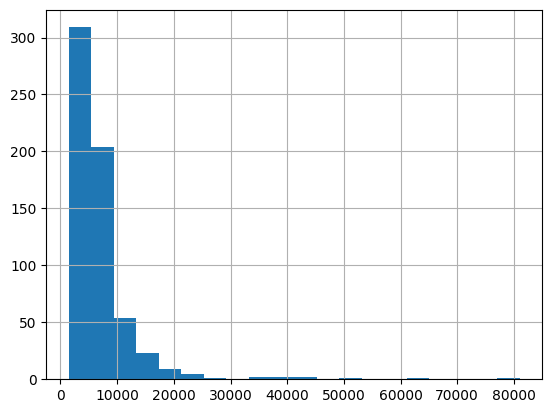

In [7]:
data['TotalIncome'].hist(bins=20)

<Axes: >

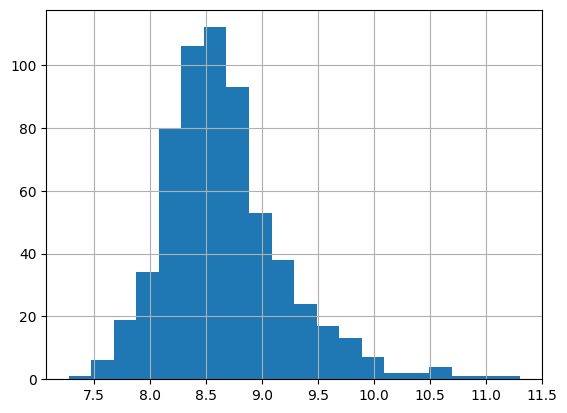

In [8]:
data['TotalIncome_log']=np.log(data['TotalIncome'])
data['TotalIncome_log'].hist(bins=20)

<Axes: >

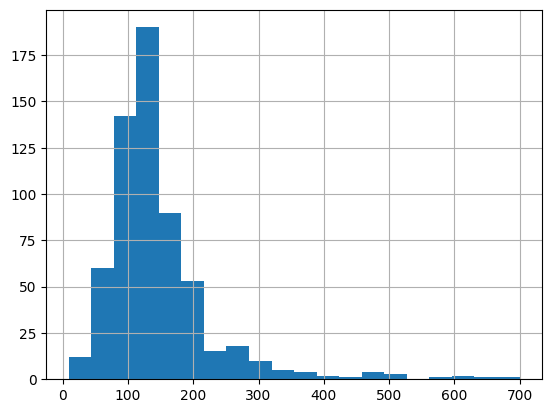

In [9]:
data['LoanAmount'].hist(bins=20)

In [10]:
data['LoanAmount_log']=np.log(data['LoanAmount'])

In [11]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760


In [12]:
x=data.iloc[:,np.r_[1:5,9:11,13:15]].values
y=data.iloc[:,12]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()

In [15]:
for i in range(0,5):
    x_train[:,i]=labelencoder_x.fit_transform(x_train[:,i])
x_train[:,7]=labelencoder_x.fit_transform(x_train[:,7])

In [16]:
for i in range(0,5):
    x_test[:,i]=labelencoder_x.fit_transform(x_test[:,i])
x_test[:,7]=labelencoder_x.fit_transform(x_test[:,7])

In [17]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)
y_test=labelencoder_y.fit_transform(y_test)

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
y_pred=DTClassifier.predict(x_test)

In [22]:
from sklearn import metrics
print("Accuracy of Decision Tree is :",metrics.accuracy_score(y_pred,y_test))

Accuracy of Decision Tree is : 0.6178861788617886


In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
NBClassifier=GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [25]:
y_pred=NBClassifier.predict(x_test)
print("Accuracy of Bayes Algorithm: ",metrics.accuracy_score(y_pred,y_test))

Accuracy of Bayes Algorithm:  0.8373983739837398


In [26]:
testdata=pd.read_csv("/kaggle/input/loaneligibilityprediction/loan-test.csv")

In [27]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [28]:
testdata['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
testdata.LoanAmount=testdata.LoanAmount.fillna(testdata.LoanAmount.mean())
testdata['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

/tmp/ipykernel_17/3569226183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testdata['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
/tmp/ipykernel_17/3569226183.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [29]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

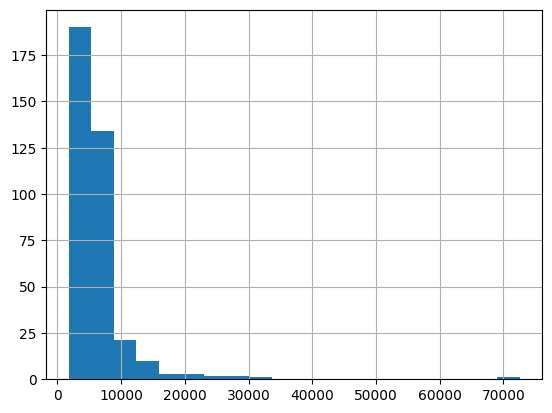

In [30]:
testdata['TotalIncome']=testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome'].hist(bins=20)

<Axes: >

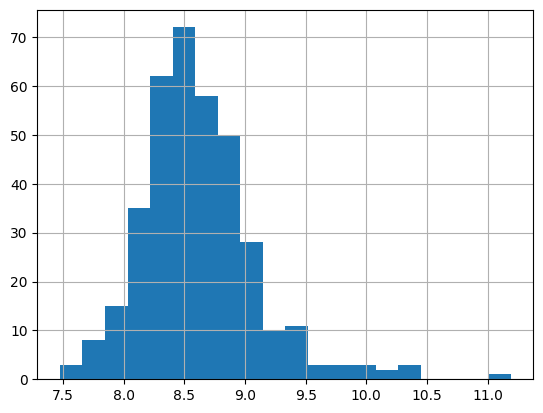

In [31]:
testdata['TotalIncome_log']=np.log(testdata['TotalIncome'])
testdata['TotalIncome_log'].hist(bins=20)

<Axes: >

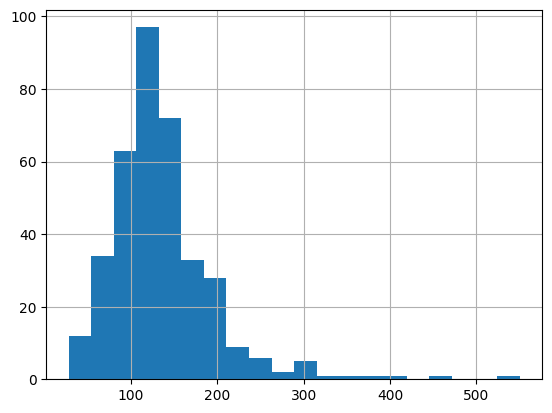

In [32]:
testdata['LoanAmount'].hist(bins=20)

<Axes: >

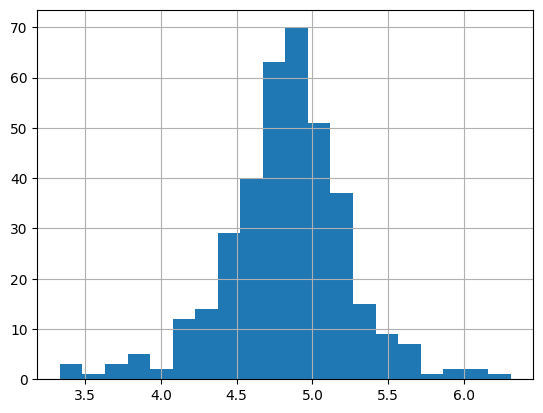

In [33]:
testdata['LoanAmount_log']=np.log(testdata['LoanAmount'])
testdata['LoanAmount_log'].hist(bins=20)

In [34]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724,4.700480
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581,4.836282
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678,5.337538
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129,4.605170
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378,4.356709


In [35]:
test=testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [36]:
for i in range(0,5):
    test[:,i]=labelencoder_x.fit_transform(test[:,i])
test[:,7]=labelencoder_x.fit_transform(test[:,7])

In [37]:
test=ss.fit_transform(test)

In [38]:
pred=NBClassifier.predict(test)

In [39]:
res=pd.DataFrame(
{
    'Loan ID':testdata.iloc[:,0],
    'Dependents':testdata.iloc[:,3],
    'Education':testdata.iloc[:,4],
    'Self-Employed':testdata.iloc[:,5],
    'Loan Amount':testdata.iloc[:,8],
})

In [40]:
res.loc[pred==1,'Loan Approved?']='Yes'
res.loc[pred==0,'Loan Approved?']='No'

In [41]:
res

,Loan ID,Dependents,Education,Self-Employed,Loan Amount,Loan Approved?
0,LP001015,0,Graduate,No,110.0,Yes
1,LP001022,1,Graduate,No,126.0,Yes
2,LP001031,2,Graduate,No,208.0,Yes
3,LP001035,2,Graduate,No,100.0,Yes
4,LP001051,0,Not Graduate,No,78.0,Yes
...,...,...,...,...,...,...
362,LP002971,3+,Not Graduate,Yes,113.0,Yes
363,LP002975,0,Graduate,No,115.0,Yes
364,LP002980,0,Graduate,No,126.0,Yes
365,LP002986,0,Graduate,No,158.0,Yes


In [42]:
res.to_csv('/kaggle/working/Result.csv',index=False)